# Adrian Kamiński
## Praca domowa 4

In [1]:
import pandas as pd
import numpy as np

### Zbiór danych `apartments`

In [2]:
from dalex.datasets import load_apartments

apartments = load_apartments()
apartments_df = apartments.drop('m2_price', axis = 1)
apartments_target = apartments.m2_price

In [3]:
apartments_df

,construction_year,surface,floor,no_rooms,district
1,1953,25,3,1,Srodmiescie
2,1992,143,9,5,Bielany
3,1937,56,1,2,Praga
4,1995,93,7,3,Ochota
5,1992,144,6,5,Mokotow
...,...,...,...,...,...
996,1921,44,2,2,Srodmiescie
997,1921,48,10,2,Bemowo
998,1980,85,3,3,Bemowo
999,1942,36,7,1,Zoliborz


In [4]:
apartments_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   construction_year  1000 non-null   int64 
 1   surface            1000 non-null   int64 
 2   floor              1000 non-null   int64 
 3   no_rooms           1000 non-null   int64 
 4   district           1000 non-null   object
dtypes: int64(4), object(1)
memory usage: 46.9+ KB


Nie występują braki danych, mamy jednak jedną kolumnę zawierającą stringi

In [5]:
apartments_df.describe()

,construction_year,surface,floor,no_rooms
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1964.823000,85.590000,5.623000,3.360000
std,25.831511,37.874799,2.899876,1.381415
min,1920.000000,20.000000,1.000000,1.000000
25%,1943.000000,53.000000,3.000000,2.000000
50%,1965.000000,85.500000,6.000000,3.000000
75%,1988.000000,118.000000,8.000000,4.000000
max,2010.000000,150.000000,10.000000,6.000000


Dane nie są przeskalowane

In [6]:
apartments.district.value_counts()

Mokotow        107
Wola           106
Ursus          105
Ursynow        103
Srodmiescie    100
Bemowo          98
Zoliborz        97
Bielany         96
Ochota          96
Praga           92
Name: district, dtype: int64

Zmienna `district` zawiera 10 unikalnych stringów. Przekodujemy ją *OneHotEncoderem*

<AxesSubplot:>

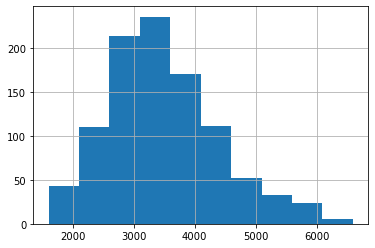

In [7]:
apartments_target.hist()

Zmienna celu ma rozkład przypominający rozkład normalny. Problem regresji.

### Zbiór danych `digits`

In [8]:
from sklearn.datasets import load_digits

digits = load_digits(as_frame=True)
digits_df = digits['data']
digits_target = digits['target']

In [9]:
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [10]:
digits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

Nie występują braki danych oraz wszystkie kolumny są floatami

In [11]:
digits_df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


Wielkości nie są ustandaryzowane - mamy kolumny z średnią >10 i takie o średnie ~ 0. Niestety po standaryzacji wiekości te nie zmienią się diametralnie.

<AxesSubplot:>

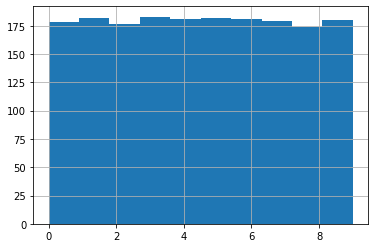

In [12]:
digits_target.hist()

Zmienna celu jest dyskretna jest ona zbalansowana. Problem klasyfikacji.

### Przygotowanie danych

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [14]:
preprocess_apartments = make_column_transformer(
    (OneHotEncoder(), ['district']), remainder='passthrough')

In [15]:
preprocess_apartments_scaled = make_column_transformer(
    (OneHotEncoder(), ['district']), remainder=StandardScaler())

In [16]:
preprocess_digits_scaled = StandardScaler()

In [17]:
from sklearn.model_selection import train_test_split

X_apartments_train, X_apartments_test, y_apartments_train, y_apartments_test = train_test_split(
    apartments_df, apartments_target, test_size=0.3, random_state=42)

X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(
    digits_df, digits_target, test_size=0.3, random_state=42)

### Trenowanie modeli

In [18]:
from sklearn.svm import SVR
from sklearn.svm import SVC

In [19]:
apartments_model = make_pipeline(preprocess_apartments, SVR())
apartments_model.fit(X_apartments_train, y_apartments_train)

apartments_model_scaled = make_pipeline(preprocess_apartments_scaled, SVR())
apartments_model_scaled.fit(X_apartments_train, y_apartments_train)


digits_model = SVC()
digits_model.fit(X_digits_train, y_digits_train)

digits_model_scaled = make_pipeline(preprocess_digits_scaled, SVC())
digits_model_scaled.fit(X_digits_train, y_digits_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

### Wpływ skalowania

#### Zbiór `apartments`

Wybór metryki - rmse

In [20]:
from sklearn.metrics import mean_squared_error as mse

In [21]:
def get_rmse(model, model_scaled, y_true, X_test):
    model_not_scaled_rsme = mse(y_true, model.predict(X_test), squared=False)
    model_scaled_rsme = mse(y_true, model_scaled.predict(X_test), squared=False)
    return model_not_scaled_rsme, model_scaled_rsme

In [22]:
aparts_not_scaled_rsme, aparts_scaled_rsme = get_rmse(apartments_model,
                                                      apartments_model_scaled,
                                                      y_apartments_test,
                                                      X_apartments_test)

In [23]:
print('RMSE on apartments dataset: \n')
print("Not scaled: ", aparts_not_scaled_rsme)
print("Scaled:     ", aparts_scaled_rsme)

RMSE on apartments dataset: 

Not scaled:  921.4746771019635
Scaled:      900.1320222577652


Widzimy poprawę jednak nie jest ona znacząca (błąd względny wynosi ok 2%), jednak poprawa to zawsze poprawa.

#### Zbiór `digits`

Wybór metryki - f1 z typem uśredniania *macro* (zbalansowana zmienna celu)

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [25]:
def get_f1(model, model_scaled, y_true, X_test):
    model_not_scaled_f1 = f1_score(y_true, model.predict(X_test), average = 'macro')
    model_scaled_f1 = f1_score(y_true, model_scaled.predict(X_test), average = 'macro')
    return model_not_scaled_f1, model_scaled_f1

In [26]:
digits_not_scaled_f1, digits_scaled_f1 = get_f1(digits_model,
                                                digits_model_scaled,
                                                y_digits_test,
                                                X_digits_test)

In [27]:
print('F1 macro on digits dataset: \n')
print("Not scaled: ", digits_not_scaled_f1)
print("Scaled:     ", digits_scaled_f1)

F1 macro on digits dataset: 

Not scaled:  0.9869102479765148
Scaled:      0.9790292278260022


Widzmy, że skalowanie nie pomogło w przypadku tego zbioru danych, może to jednak wynikać z tego iż dane są podane w pikselach więc są z podobnego zakresu.

### Optymalizacja hiperparametrów

Korzystając `RandomSearchCV` optymalizujemy hiperparametry:
- cost,
- gamma,
- degree

Z artykułu [Tunability: Importance of Hyperparameters of Machine Learning Algorithms](https://jmlr.org/papers/volume20/18-444/18-444.pdf) wybieramy zakresy z których wybierać poszczególne hiperparametry.

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
params_svr = {
    'svr__C':2 ** np.linspace(-10, 10, 10),
    'svr__gamma':2 ** np.linspace(-10, 10, 10),
    'svr__degree': [2, 3, 4, 5]
}
params_svc = {
    'svc__C':2 ** np.linspace(-10, 10, 10),
    'svc__gamma':2 ** np.linspace(-10, 10, 10),
    'svc__degree': [2, 3, 4, 5]
}

#### Apartments

In [30]:
apartments_model = make_pipeline(preprocess_apartments, SVR())

random_cv = RandomizedSearchCV(apartments_model, params_svr,
                               scoring ='neg_root_mean_squared_error', n_iter= 50, n_jobs=-1)

random_cv.fit(X_apartments_train, y_apartments_train)

apartments_model_best = random_cv.best_estimator_
apartments_model_best_params = random_cv.best_params_

In [31]:
apartments_model_scaled = make_pipeline(preprocess_apartments_scaled, SVR())

random_cv = RandomizedSearchCV(apartments_model_scaled, params_svr,
                               scoring ='neg_root_mean_squared_error', n_iter= 50, n_jobs=-1)

random_cv.fit(X_apartments_train, y_apartments_train)

apartments_model_scaled_best = random_cv.best_estimator_
apartments_model_scaled_best_params = random_cv.best_params_

In [32]:
aparts_not_scaled_best_rsme, aparts_scaled_best_rsme = get_rmse(apartments_model_best,
                                                                apartments_model_scaled_best,
                                                                y_apartments_test,
                                                                X_apartments_test)

Najlepsze hiperparametry:

In [33]:
print('Not scaled: ', apartments_model_best_params)
print("Scaled:     ", apartments_model_scaled_best_params)

Not scaled:  {'svr__gamma': 0.0009765625, 'svr__degree': 2, 'svr__C': 1024.0}
Scaled:      {'svr__gamma': 0.09921256574801249, 'svr__degree': 2, 'svr__C': 1024.0}


In [34]:
print('RMSE on apartments dataset: \n')
print("Not scaled: ", aparts_not_scaled_rsme)
print("Scaled:     ", aparts_scaled_rsme)

print('\nOn tunned models')
print("Not scaled: ", aparts_not_scaled_best_rsme, " ", aparts_not_scaled_best_rsme-aparts_not_scaled_rsme)
print("Scaled:     ", aparts_scaled_best_rsme, "",aparts_scaled_best_rsme-aparts_scaled_rsme)

RMSE on apartments dataset: 

Not scaled:  921.4746771019635
Scaled:      900.1320222577652

On tunned models
Not scaled:  794.1942751776642   -127.28040192429933
Scaled:      167.83678167272456  -732.2952405850407


Po wyborze hiperparametrów widzimy ok. 10% spadek przy RMSE przy modelu nie przeskalowany zbiorze co nas zadawala, jednak RMSE na zbiorze przeskalowanym z wyborem najlepszych hiperparametów zmiejszył się o ponad 80% i dał bardzo zadawalający wynik.

#### Digits

In [35]:
digits_model = make_pipeline(SVC())

random_cv = RandomizedSearchCV(digits_model, params_svc,
                               scoring ='f1_macro', n_iter= 50, n_jobs=-1)

random_cv.fit(X_digits_train, y_digits_train)

digits_model_best = random_cv.best_estimator_
digits_model_best_params = random_cv.best_params_

In [36]:
digits_model_scaled = make_pipeline(preprocess_digits_scaled, SVC())

random_cv = RandomizedSearchCV(digits_model_scaled, params_svc,
                               scoring ='f1_macro', n_iter= 50, n_jobs=-1)

random_cv.fit(X_digits_train, y_digits_train)

digits_model_scaled_best = random_cv.best_estimator_
digits_model_scaled_best_params = random_cv.best_params_

In [37]:
digits_not_scaled_best_f1, digits_scaled_best_f1 = get_f1(digits_model_best,
                                                          digits_model_scaled_best,
                                                          y_digits_test,
                                                          X_digits_test)

Najlepsze hiperparametry:

In [38]:
print('Not scaled: ', digits_model_best_params)
print("Scaled:     ", digits_model_scaled_best_params)

Not scaled:  {'svc__gamma': 0.0009765625, 'svc__degree': 2, 'svc__C': 219.45445961038678}
Scaled:      {'svc__gamma': 0.004556754060844206, 'svc__degree': 3, 'svc__C': 1024.0}


In [39]:
print('F1 macro on digits dataset: \n')
print("Not scaled: ", digits_not_scaled_f1)
print("Scaled:     ", digits_scaled_f1)

print('\nOn tunned models')
print("Not scaled: ", digits_not_scaled_best_f1, " +", digits_not_scaled_best_f1 - digits_not_scaled_f1)
print("Scaled:     ", digits_scaled_best_f1, " +", digits_scaled_best_f1 - digits_scaled_f1)

F1 macro on digits dataset: 

Not scaled:  0.9869102479765148
Scaled:      0.9790292278260022

On tunned models
Not scaled:  0.9909126723133541  + 0.004002424336839283
Scaled:      0.9851805093467233  + 0.006151281520721086


Model już poprzednio osiągał bardzo wysoki wynik, dlatego po dobraniu hiperparametrów wynik ten zmienił się tylko o części tysięczne ale znowu widzimy większą poprawę na zbiorze przeskalowanym jednak wynik ten wciąż jest mniejszy niż na zbiorze oryginalnym